<h1 align="center">Wine Quality Prediction </h1>

In [24]:
%pylab inline
pylab.style.use('ggplot')
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Loading the data into the a Pandas DataFrame

In [25]:
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_df = pd.read_csv(url, sep=';')

In [26]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
wine_df = wine_df.rename(columns={c: c.lower().replace(' ', '_') for c in wine_df.columns})

In [28]:
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Check for Data Types / Missing Data

In [29]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
ph                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data Exploration

### Summary Statistics

In [30]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
ph,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Check for Outliers

In [31]:
feature_means = wine_df.drop('quality', axis=1).mean(axis=0)
feature_medians = wine_df.drop('quality', axis=1).median(axis=0)

feature_means - feature_medians 

fixed_acidity           0.419637
volatile_acidity        0.007821
citric_acid             0.010976
residual_sugar          0.338806
chlorides               0.008467
free_sulfur_dioxide     1.874922
total_sulfur_dioxide    8.467792
density                -0.000003
ph                      0.001113
sulphates               0.038149
alcohol                 0.222983
dtype: float64

All the features except density has mean > median. This indicates possibility of presence of outliers.

### Per-feature Boxplots

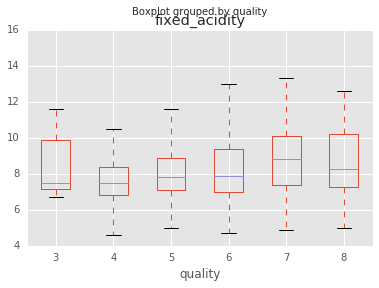

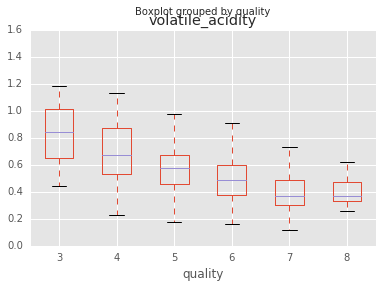

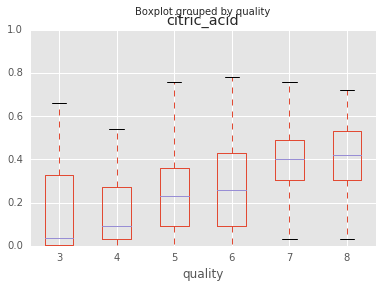

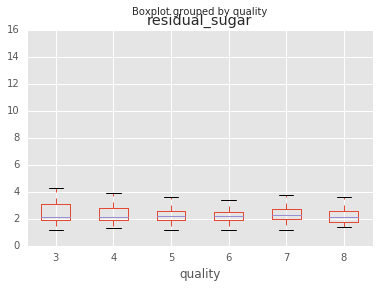

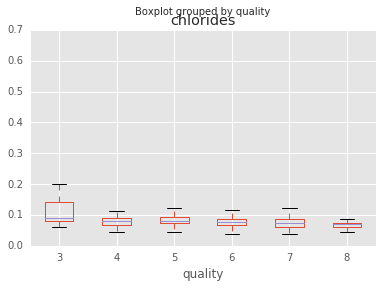

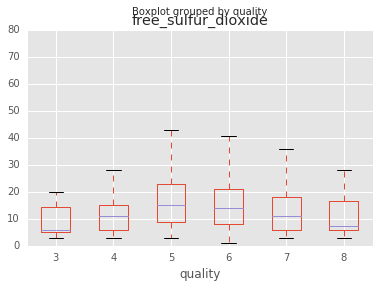

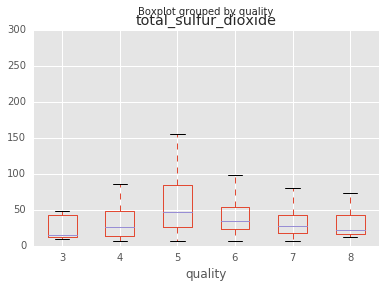

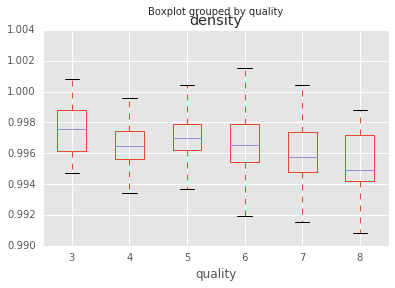

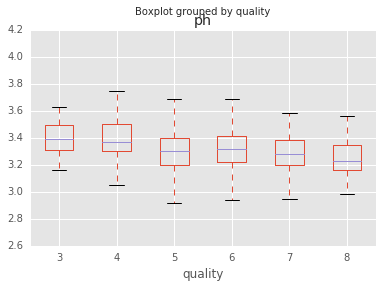

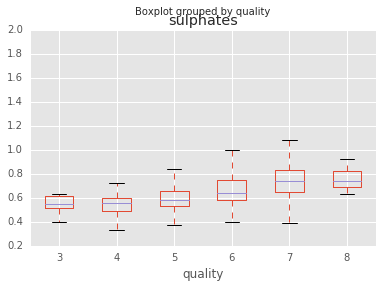

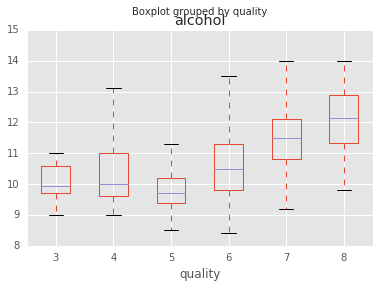

In [32]:
for feature_name in wine_df.keys():
    if feature_name != 'quality':
        wine_df.boxplot(by='quality', column=feature_name)

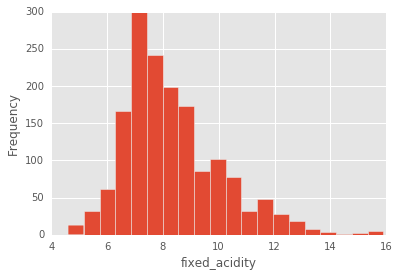

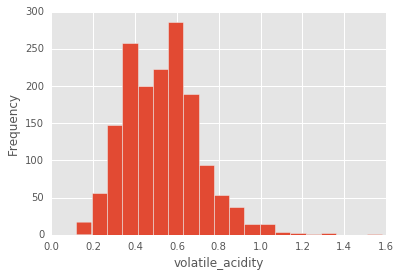

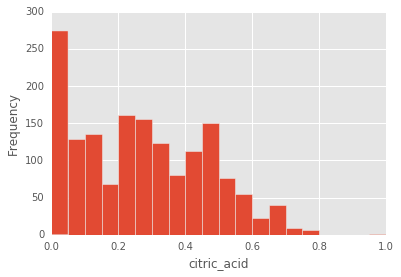

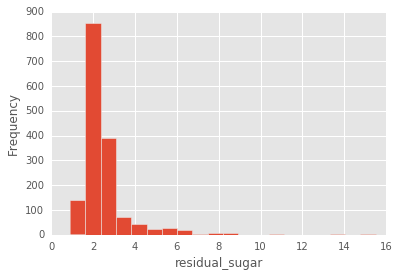

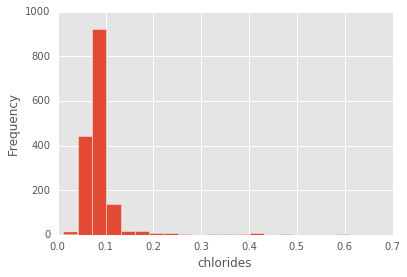

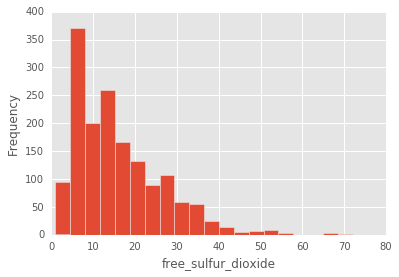

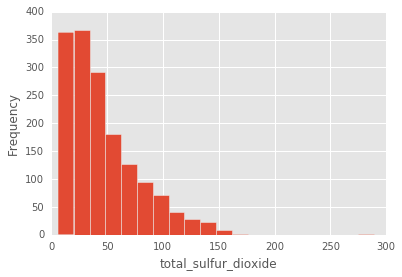

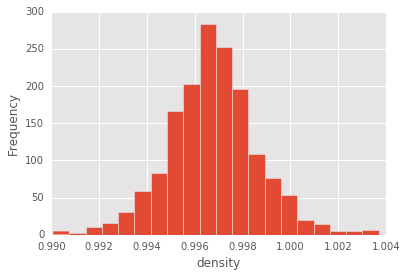

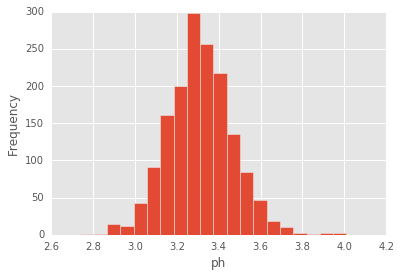

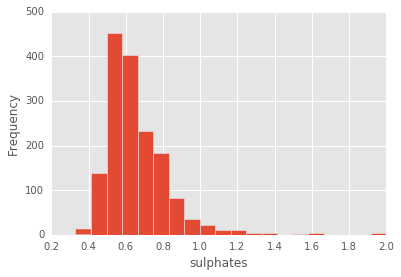

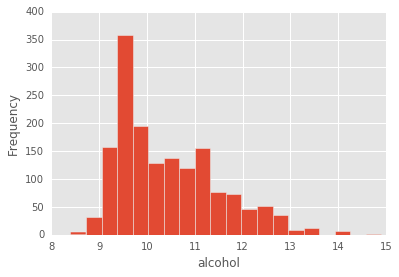

In [47]:
for feature_name in wine_df.keys():
    if feature_name != 'quality':
        pylab.figure()
        ax = wine_df[feature_name].plot(kind='hist', bins=20)
        ax.set(xlabel=feature_name)

## Feature Correlations

In [34]:
feature_corrs = wine_df.drop('quality', axis=1).corr()

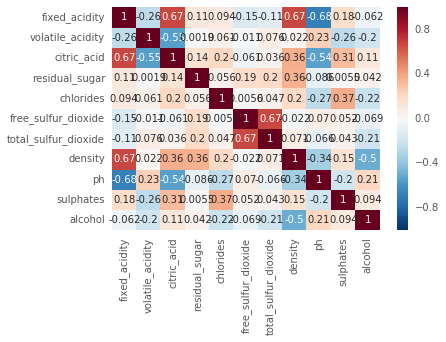

In [35]:
import seaborn as sns
sns.heatmap(feature_corrs, annot=True)

## Feature Correlations with Quality

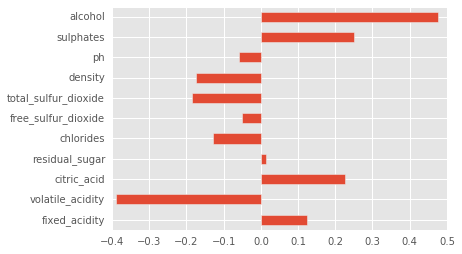

In [36]:
features_df = wine_df.drop('quality', axis=1)
features_df.corrwith(wine_df['quality']).plot(kind='barh')

## Feature Counts Per Label

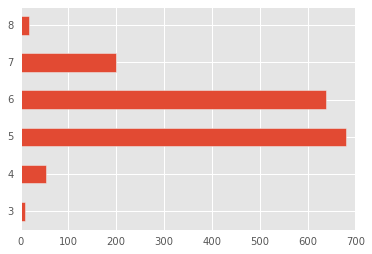

In [37]:
wine_df['quality'].value_counts().sort_index().plot(kind='barh')

In [38]:
import statsmodels.formula.api as sm
model = sm.ols(formula='quality ~ alcohol + volatile_acidity', data=wine_df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     370.4
Date:                Sat, 08 Apr 2017   Prob (F-statistic):          7.35e-133
Time:                        23:21:51   Log-Likelihood:                -1621.8
No. Observations:                1599   AIC:                             3250.
Df Residuals:                    1596   BIC:                             3266.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.0955      0.184     16.778      0.000       2.734       3.457
alcohol              0.3138      0.016     19.604      0.000       0.282       0.345
volatile_acidity    -1.3836      0.095    -14.524      0.000      -1.570      -1.197
==============================================================================
Omnibus:                       17.005   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.998
Skew:                          -0.064   Prob(JB):                     2.26e-06
Kurtosis:                       3.611   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
import statsmodels.formula.api as sm
formula = ' quality ~ ' + ' + '.join([c for c in wine_df.keys() if c != 'quality'])
model_all = sm.ols(formula=formula, data=wine_df)
result_all = model_all.fit()
result_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sat, 08 Apr 2017   Prob (F-statistic):          1.79e-145
Time:                        23:21:51   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.9652     21.195      1.036      0.300     -19.607      63.538
fixed_acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile_acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric_acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual_sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free_sulfur_dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total_sulfur_dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
ph                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

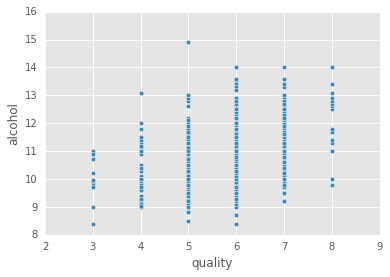

In [40]:
wine_df.sort_values('quality').plot(kind='scatter', x='quality', y='alcohol')

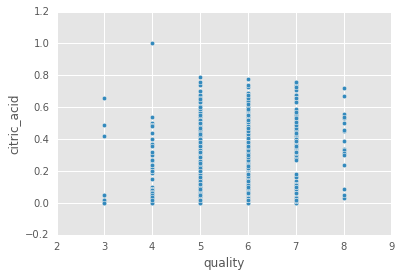

In [41]:
wine_df.sort_values('quality').plot(kind='scatter', x='quality', y='citric_acid')

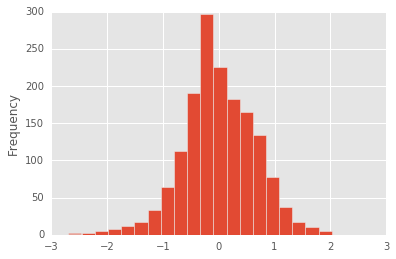

In [42]:
result_all.resid.plot(kind='hist', bins=20)

## Investigate if Dimension Reduction is Applicable

In [43]:
feature_cov = wine_df.drop('quality', axis=1).cov()
np.linalg.matrix_rank(feature_cov)

11

In [44]:
import sklearn.preprocessing as prep
feature_df = wine_df.drop('quality', axis=1)
target_df = wine_df['quality']

scaler = prep.StandardScaler().fit_transform(feature_df)
scaled_features_df = pd.DataFrame(data=scaler, index=target_df.index, columns=feature_df.columns)

In [45]:
scaled_features_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


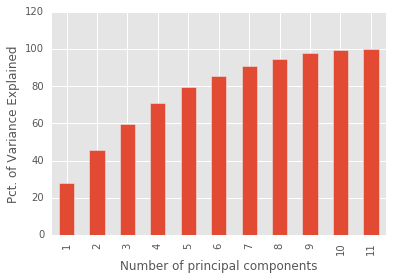

In [46]:
from sklearn.decomposition import PCA

var_explained = {}

for index, _ in enumerate(scaled_features_df.columns):
    pca = PCA(n_components=index+1)
    result = pca.fit(scaled_features_df)
    exp_var_pct = np.sum(result.explained_variance_ratio_) * 100.0
    var_explained[index+1] = exp_var_pct
    
ax = pd.Series(var_explained).plot(kind='bar')
ax.set(xlabel='Number of principal components', ylabel='Pct. of Variance Explained')